Importing Libraries

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

Load MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X, y = mnist["data"], mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Convert DataFrame to NumPy array

In [3]:
X = X.to_numpy()
y = y.to_numpy()

Display a digit image

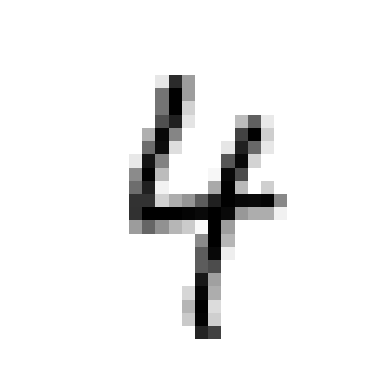

In [4]:
some_digit = X[26000].reshape(28, 28)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')
plt.show()

Split the dataset into train and test sets

In [5]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Convert target labels to binary (4 vs non-4)

In [6]:
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

Train the classifier

In [7]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_4)

SGDClassifier(random_state=42)

Reshape some_digit to be a batch of a single sample

In [10]:
some_digit = some_digit.reshape(1, -1)

Predict the digit using the trained classifier

In [11]:
sgd_clf.predict(some_digit)

array([ True])

Perform cross-validation

In [12]:
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring='accuracy')

array([0.9671 , 0.97645, 0.9687 ])

Perform cross-validated predictions

In [13]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)

Compute confusion matrix

In [14]:
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]])

Compute precision

In [15]:
precision_score(y_train_4, y_train_pred)

0.8149175527816305

Compute recall

In [16]:
recall_score(y_train_4, y_train_pred)

0.905169462512838

Compute F1 score

In [17]:
f1_score(y_train_4, y_train_pred)

0.8576757764982564